<a href="https://colab.research.google.com/github/Mahesh0468/Codsoft/blob/main/Creditcard_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cr = pd.read_csv('/content/sample_data/fraudTrain.csv')
cr.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [4]:
df=cr.drop(['trans_date_trans_time','cc_num','merchant','street','lat','long','city_pop', 'dob', 'trans_num',	'unix_time'	,'merch_lat','merch_long','state','zip','first', 'last'], axis= 'columns')


In [5]:
df.head()

,Unnamed: 0,category,amt,gender,city,job,is_fraud
0,0,misc_net,4.97,F,Moravian Falls,"Psychologist, counselling",0.0
1,1,grocery_pos,107.23,F,Orient,Special educational needs teacher,0.0
2,2,entertainment,220.11,M,Malad City,Nature conservation officer,0.0
3,3,gas_transport,45.00,M,Boulder,Patent attorney,0.0
4,4,misc_pos,41.96,M,Doe Hill,Dance movement psychotherapist,0.0


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
category,0
amt,0
gender,0
city,0
job,1
is_fraud,1


In [7]:
df.dtypes

,0
Unnamed: 0,int64
category,object
amt,float64
gender,object
city,object
job,object
is_fraud,float64


In [8]:
df['job'].value_counts()

,count
job,
Exhibition designer,93
"Designer, ceramics/pottery",89
Film/video editor,83
Systems developer,82
"Scientist, research (maths)",73
...,...
Analytical chemist,2
Broadcast engineer,2
Lawyer,2


In [9]:
df['category'].value_counts()

,count
category,
gas_transport,1237
grocery_pos,1153
home,1125
shopping_pos,1037
kids_pets,1001
shopping_net,859
personal_care,837
entertainment,826
food_dining,818


In [10]:
df['city'].value_counts()

,count
city,
San Antonio,60
Phoenix,55
Birmingham,55
Warren,52
Thomas,50
...,...
Linthicum Heights,1
Los Angeles,1
Jackson,1


<Axes: xlabel='count', ylabel='category'>

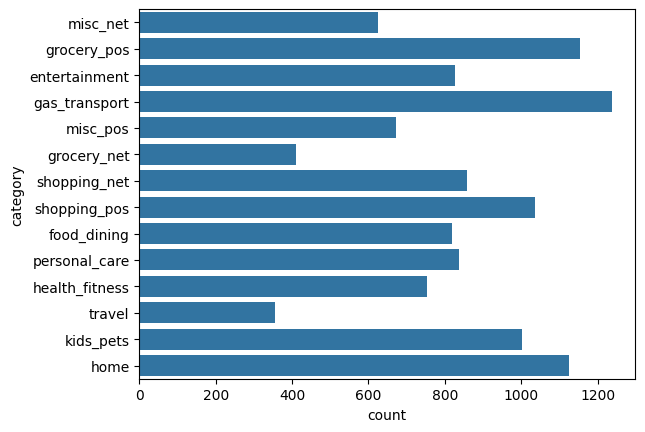

In [11]:
sns.countplot(df['category'],)

<ipython-input-12-de279fcd6992>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_category_df, x='category', order=top_category, palette='viridis')


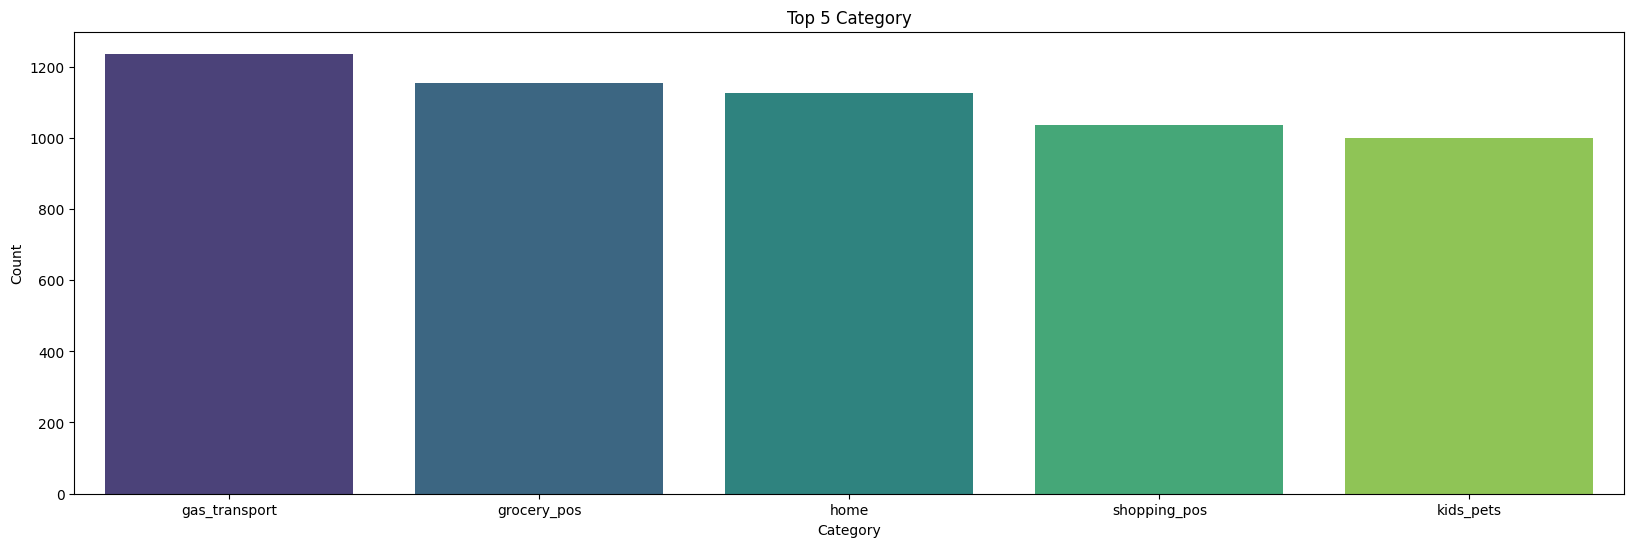

In [12]:
top_category = df['category'].value_counts().nlargest(5).index
top_category_df = df[df['category'].isin(top_category)]
plt.figure(figsize=(20,6))
sns.countplot(data=top_category_df, x='category', order=top_category, palette='viridis')
plt.title('Top 5 Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

<ipython-input-13-31e5237aade0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_job_df, x='job', order=top_job, palette='viridis')


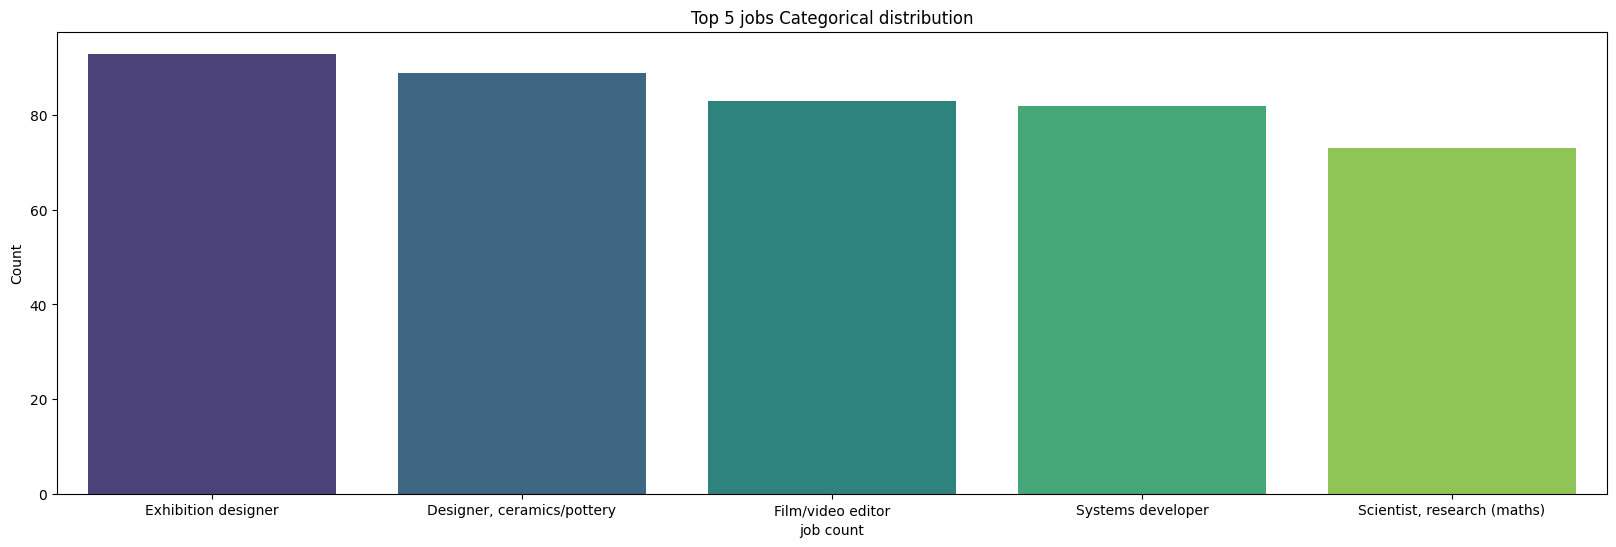

In [13]:
top_job = df['job'].value_counts().nlargest(5).index
top_job_df = df[df['job'].isin(top_job)]
plt.figure(figsize=(20,6))
sns.countplot(data=top_job_df, x='job', order=top_job, palette='viridis')
plt.title('Top 5 jobs Categorical distribution')
plt.xlabel('job count')
plt.ylabel('Count')
plt.show()

Dispaly male and female percentage

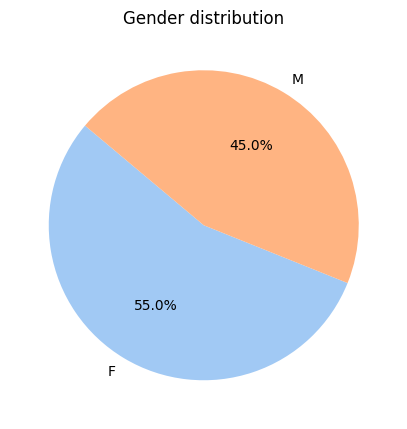

In [14]:
gender_counts = df['gender'].value_counts()
colors = sns.color_palette('pastel')
plt.figure(figsize=(5,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender distribution')
plt.show()

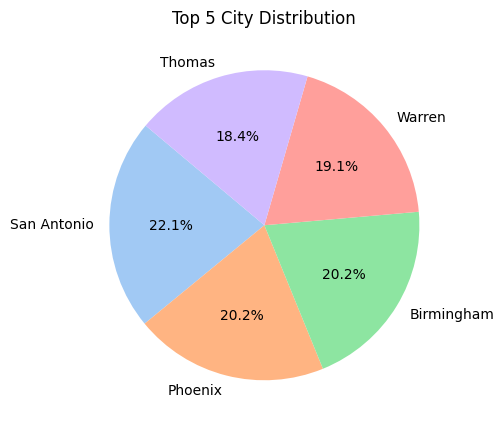

In [15]:
city_counts = df['city'].value_counts().nlargest(5)
colors = sns.color_palette('pastel')[0:len(city_counts)]
plt.figure(figsize=(5,6))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 City Distribution')
plt.show()

In [16]:
df.head()

,Unnamed: 0,category,amt,gender,city,job,is_fraud
0,0,misc_net,4.97,F,Moravian Falls,"Psychologist, counselling",0.0
1,1,grocery_pos,107.23,F,Orient,Special educational needs teacher,0.0
2,2,entertainment,220.11,M,Malad City,Nature conservation officer,0.0
3,3,gas_transport,45.00,M,Boulder,Patent attorney,0.0
4,4,misc_pos,41.96,M,Doe Hill,Dance movement psychotherapist,0.0


In [17]:
df['gender'].replace({'M': 1, 'F': 0},inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column separately
for col in ['category', 'city', 'job']:
    df[col] = le.fit_transform(df[col])

# If you need one-hot encoding, use OneHotEncoder after LabelEncoding
# ohe = OneHotEncoder()
# df_encoded = ohe.fit_transform(df[['category', 'city', 'job']])

In [19]:
df.head()

,Unnamed: 0,category,amt,gender,city,job,is_fraud
0,0,8,4.97,0,493,356,0.0
1,1,4,107.23,0,567,411,0.0
2,2,0,220.11,1,439,294,0.0
3,3,2,45.00,1,81,315,0.0
4,4,9,41.96,1,203,110,0.0


In [20]:
df.dtypes

,0
Unnamed: 0,int64
category,int64
amt,float64
gender,int64
city,int64
job,int64
is_fraud,float64


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is a NumPy array or pandas DataFrame with numerical features
scaler = MinMaxScaler()
numerical_cols = ['category', 'city', 'job']

# Extract the numerical data from the DataFrame
numerical_data = df[numerical_cols]

# Scale the numerical data using MinMaxScaler
scaled_data = scaler.fit_transform(numerical_data)

df[numerical_cols] = scaled_data

In [22]:
df.head()

,Unnamed: 0,category,amt,gender,city,job,is_fraud
0,0,0.615385,4.97,0,0.592548,0.749474,0.0
1,1,0.307692,107.23,0,0.681490,0.865263,0.0
2,2,0.000000,220.11,1,0.527644,0.618947,0.0
3,3,0.153846,45.00,1,0.097356,0.663158,0.0
4,4,0.692308,41.96,1,0.243990,0.231579,0.0


In [23]:
df['amt']=df['amt'].astype(int)

In [24]:
df.dtypes

,0
Unnamed: 0,int64
category,float64
amt,int64
gender,int64
city,float64
job,float64
is_fraud,float64


Splitting the data into train and test

In [31]:
# Remove rows with NaN in 'is_fraud' column from the original DataFrame
df = df.dropna(subset=['is_fraud'])

# Recreate X and Y after removing NaN
X = df.drop('is_fraud', axis=1)
Y = df['is_fraud']

# Redo the train-test split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Now you can fit the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In [32]:
lr.score(xtrain, ytrain)

0.9945536095685604

In [33]:
from sklearn.metrics import accuracy_score
ypred = lr.predict(xtest)
accuracy_score(ytest, ypred)

0.9957283212302435

We get an accuracy of about 99 % after training the model